
Laboratorio 06: Máquinas de Soporte Vectorial (SVM)
=========================================

David Cardenas Peña, PhD. Cristian Alfonso Jimenez, MSc

Edificio de Ingeniería Eléctrica, Oficina 1B-131

email: {dcardenasp,craljimenez}@utp.edu.co

21 de mayo de 2020

# Objetivos

*   Identificar los elementos de las máquinas de soporte vectorial y su labor.
*   Apropiarse de una estrategia de sintonización de parámetros libres de los modelos empleando técnicas de validación.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import  make_moons, make_circles, make_blobs, load_digits, make_classification

In [2]:
#Bloque para definir los datasets:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

# Actividad 1

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

## Consulte cómo usar el módulo Support Vector Machine de scikit-learn (sklearn.svm.SVC) para entrenar clasificadores SVM. 

```python
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

Se usa de la misma forma que se han utilizado las redes neuronales y otros clasificadores, tienen mas parametros que permiten uso de otras caracteristicas que tienen (tambien se hace entramiento con pipeline y lo que hace en si es seralizar el proceso de entrenamiento)
```

Las maquinas SVM cuando son convertidas a dimensión infinita permite separar todas las clases mas "facilmente". De igual forma el modelo encuentra el "como solucionarlo" mediante el problema dual.

## ¿Cómo se usan los métodos fit() y decision_function()? 
### fit()
Este método ajusta el modelo de la maquina a razón de los datos de entrenamiento **X** y **Y**

### decision_function()
Evalua la decisión que tendrá la maquina respecto a los datos que pasaron de X. Evaluando la decisión sin la función signo, donde el resultado que entrega el score que tenga cada dato mostrando que tan lejos está del hiperplano. Es decir cada valor de X ha de tener su clasificación para ser evaluada



## ¿Qué información proveen los atributos coef_, dual_coef_, n_support_ y support_vectors_?

### _coef
Muestra el peso que tiene asignado las caracreristicas (los coeficientes en el problema primal) solo está para los casos de problema linear. Solo está disponible para cuando se usan los Kernel lineal debido a que los problemas cuando no son lineales se mapean los datos de menor a mayor dimensión. Con RBF se mapean los datos a un espacio de dimensionalidad infinita, por ende la RBF es el kernel universal para estas maquinas

### dual_coef
El coeficiente dual es un valor de la función de decisión que es multiplicado por sus Target. Este coefiiente es para todos los clasificadores 1 contra 1. La estructura de los coeficientes en multiclase es no trivial.

Este valor permite expandir el problema a multi-clase, vienen a ser los multiplicadores de la granje

### n_support
Número n de vectores de soporte para el modelo

### support_vectors_
Vectores de soporte. Un vector de suporte son las sumatorias que hacen a referencia para separar las clases a razón de un rango de cada clasificación siendo la distancia entre hiperplanos de cada clase.

Este entrega las muestras de entrenamiento que quedaron como vectores de soporte


## ¿Qué tipo de kernels acepta el módulo SVM de scikit-learn? ¿Cuáles son sus parámetros y qué significan?
Los kernels que recibe las SVM son ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’, por defecto es RBF y en el caso de precomputed este recibe el parametro de una matriz (n_samples, n_samples)




# Actividad 2

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

## Consulte para qué sirven y cómo se entrenan modelos por medio de una Grilla de parámetros (sklearn.model_selection.GridSearchCV)?
Hace busqueda intensiva sobre algun parametro especifico de algun estimador, los miembros importantes son los que hacen parte del fit para ser predecidos. La GridSearchCV tiene implementado los metodos “predict”, “predict_proba”, “decision_function”, “transform” y “inverse_transform” utilizados para la estimación y aplicar cross validación de forma optimizada de un parametro de la grilla.

Esto separa los datos en una proporción de CV (por defecto es 5) tambien puede ser especificado los datos de entramiento y los datos a utilizar en sus posibles combinaciones de busqueda almacenando los de mejor entrenamiento para asi evaluar mediante k-fold en sus diferentes combinaciones en su valor de CV.

Esta tiene un parametro que es **n_jobs** que permite paralelizar el proceso mediante varios nucleos del procesador -1 toma todos los que hay


## Actividad 3

Use el módulo Support Vector Machine de scikit-learn (sklearn.svm.SVC) para entrenar una SVM de clasificación con kernel **lineal** y **C=1**. 

Grafique:
1.   Los vectores de soporte
2.   La frontera de  decisión
3.   La margen

Discuta la ubicación de los vectores de soporte y las márgenes.

La base de datos contiene 100 muestras en 2 dimensiones, distribuídas en las clases [0 1] .
El modelo se evaluará en una malla de 900 muestras.
(30, 30)


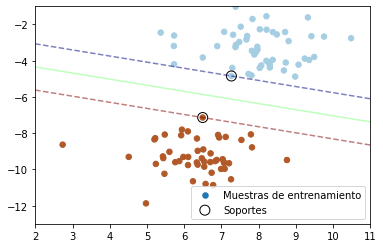

In [6]:
# Creación de la base de datos
X, y = make_blobs(n_samples=100, centers=2, random_state=6)
print('La base de datos contiene',X.shape[0],'muestras en',X.shape[1],'dimensiones, distribuídas en las clases',
      np.unique(y),'.')

# Creación de una malla para evaluar el modelo
x1 = np.linspace(2,11, 30)
x2 = np.linspace(-13,-1,30)
X1, X2 = np.meshgrid(x1, x2)
Xtest = np.vstack([X1.ravel(), X2.ravel()]).T
print('El modelo se evaluará en una malla de',Xtest.shape[0],'muestras.')

# Agregar el código entrenar el modelo
from sklearn.svm import SVC
svcObj = SVC(gamma='auto', kernel='linear', C=1).fit(X,y)



# Extraer los vectores de soportes
soportes = svcObj.support_vectors_ #Reemplazar por la línea de código para extraer los soportes del objeto de clasificación

# Evaluar la función de decisión del modelo en la malla


#Ytest = X1**2+X2 #Reemplazar con el método para evaluar la función de decisión en Xtest
# decision_function -> f(x)
Ytest = svcObj.decision_function(Xtest)

# Predicción es signo(f(x))

print(X1.shape)
#Construir un vector de umbrales con tres valores que representen el valor en la margen para la clase negativa, la frontera,
# y el valor en la margen para la clase positiva

# los umbrale sosn la clase negativa -1, los que se 
# acercan al hiperplano (el valor 0) y los de la 
# clase positiva +1
umbrales = [-1,0,1]


#Graficar la base de datos
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
#Graficar los soportes
plt.scatter(soportes[:, 0], soportes[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

# Graficar frontera y margen
plt.contour(X1, X2, Ytest.reshape(X1.shape), levels=umbrales, alpha=0.5,
           linestyles=['--', '-', '--'],cmap=plt.get_cmap('jet'))

plt.legend(('Muestras de entrenamiento','Soportes'))
plt.show()
# En este caso utilizó solo 2 vectores de soporte para clasificar

## Actividad 4:
A partir la actividad 3, reduzca el valor de la restricción C paulatinamente hasta 0.01. Deben de probar varios valores de $C\in[0.01,1]$, los pasos lo deciden ustedes. 

Grafique Los multiplicadores de lagrange del problema dual usando diferentes valores de C.

Discuta la relación entre el valor de la restricción C, la cantidad de vectores de soporte, y los valores de los multiplicadores de Lagrange del problema dual.

(1, 24) 
 [[-0.01       -0.01       -0.01       -0.01       -0.01       -0.01
  -0.01       -0.01       -0.01       -0.01       -0.01       -0.00764131
   0.01        0.01        0.01        0.01        0.01        0.01
   0.00764131  0.01        0.01        0.01        0.01        0.01      ]]


<ipython-input-10-87941f84560f>:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(multiplicadores.reshape(-1,))


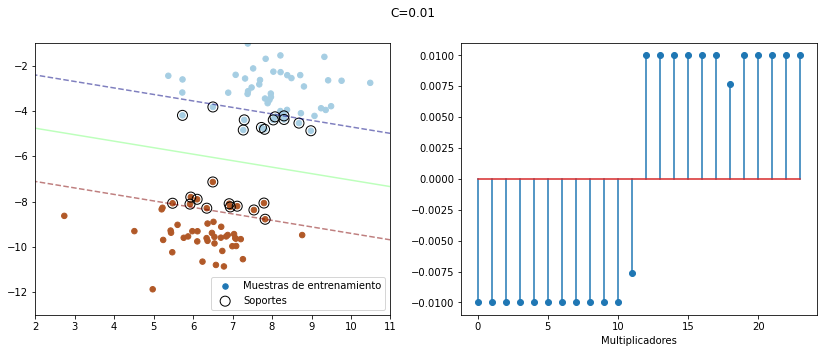

(1, 4) 
 [[-0.10391916 -0.12        0.12        0.10391916]]


<ipython-input-10-87941f84560f>:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(multiplicadores.reshape(-1,))


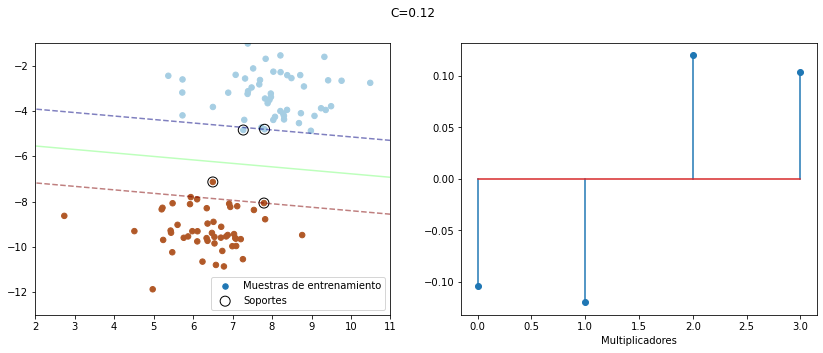

(1, 4) 
 [[-0.02635435 -0.23        0.23        0.02635435]]


<ipython-input-10-87941f84560f>:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(multiplicadores.reshape(-1,))


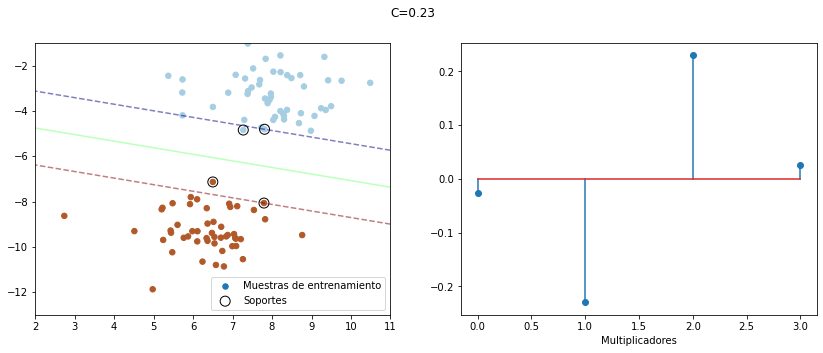

(1, 2) 
 [[-0.34  0.34]]


<ipython-input-10-87941f84560f>:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(multiplicadores.reshape(-1,))


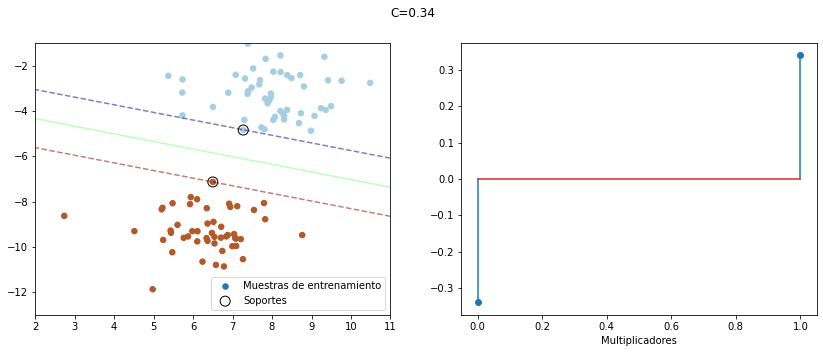

(1, 2) 
 [[-0.341651  0.341651]]


<ipython-input-10-87941f84560f>:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(multiplicadores.reshape(-1,))


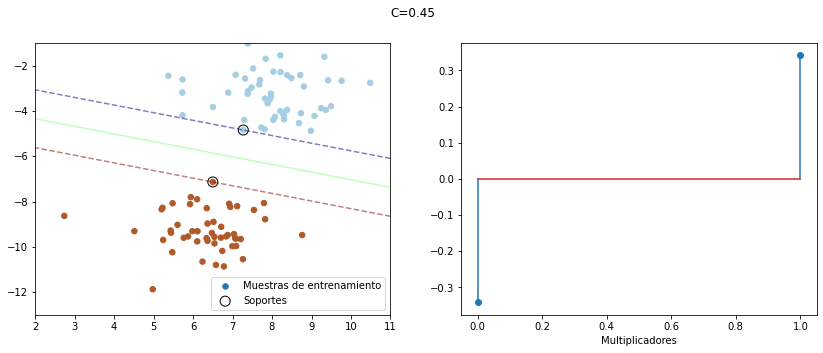

(1, 2) 
 [[-0.341651  0.341651]]


<ipython-input-10-87941f84560f>:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(multiplicadores.reshape(-1,))


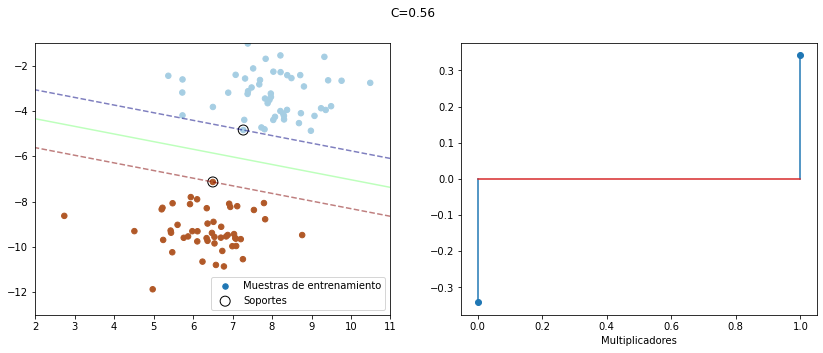

(1, 2) 
 [[-0.341651  0.341651]]


<ipython-input-10-87941f84560f>:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(multiplicadores.reshape(-1,))


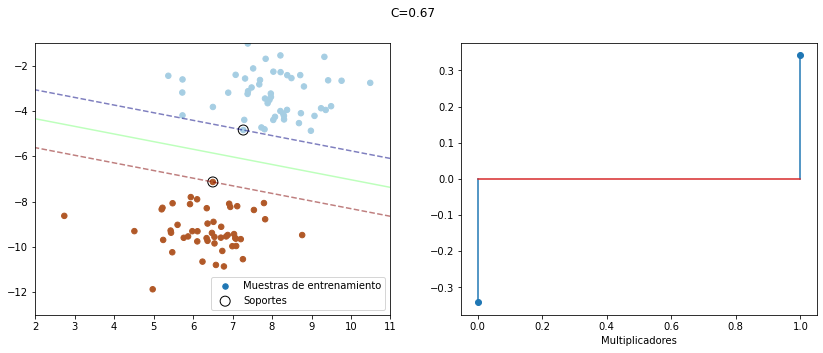

(1, 2) 
 [[-0.341651  0.341651]]


<ipython-input-10-87941f84560f>:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(multiplicadores.reshape(-1,))


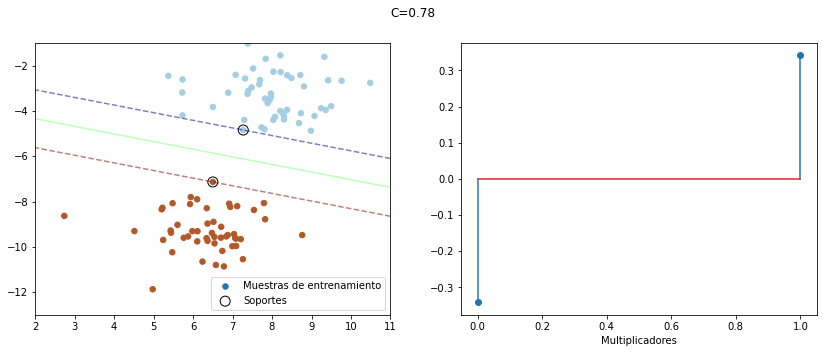

(1, 2) 
 [[-0.341651  0.341651]]


<ipython-input-10-87941f84560f>:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(multiplicadores.reshape(-1,))


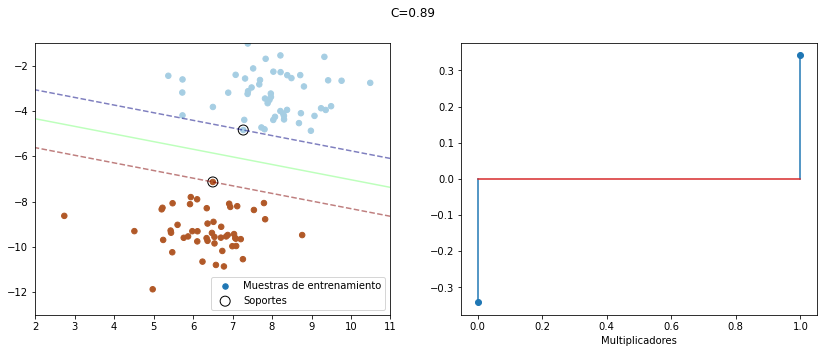

(1, 2) 
 [[-0.341651  0.341651]]


<ipython-input-10-87941f84560f>:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(multiplicadores.reshape(-1,))


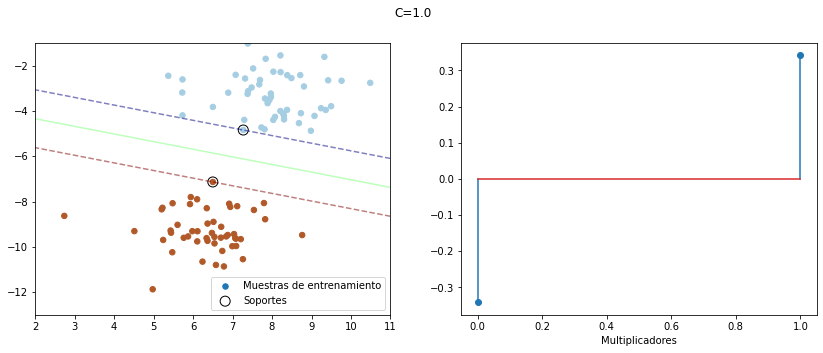

In [10]:
#Agregue el código necesario para entrenar la SVM:
for C in np.linspace(0.01, 1, 10):
  svcObj = SVC(gamma='auto', kernel='linear', C=C).fit(X,y)
  #Extraer los multiplicdores
  multiplicadores = svcObj.dual_coef_ #Reemplazar por el atributo del objeto de clasificación que contiene los multiplicadores de Lagrange
  print(multiplicadores.shape,'\n',multiplicadores)
  #extraer los vectores de soportes 
  soportes = svcObj.support_vectors_ # reemplazar por método que extrae los vectores de soporte
  #Calcular la función de decisión sobre los Xtest de la actividad anterior.
  Ytest=svcObj.decision_function(Xtest) #Reemplazar con el método para evaluar la función de decisión en Xtest
    
  #Graficar la base de datos
  plt.figure(figsize=(14,5)) 
  plt.subplot(1,2,1)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)


  #Graficar los soportes
  plt.scatter(soportes[:, 0], soportes[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')


  # Graficar frontera y margen
  plt.contour(X1, X2, Ytest.reshape(X1.shape), levels=umbrales, alpha=0.5,
            linestyles=['--', '-', '--'],cmap=plt.get_cmap('jet'))

  plt.legend(('Muestras de entrenamiento','Soportes'))

  #Graficar los multiplicadores
  plt.subplot(1,2,2)
  plt.stem(multiplicadores.reshape(-1,))
  plt.xlabel('Multiplicadores')
  
  plt.suptitle('C={}'.format(C))
  plt.show()

# Actividad 5

Entrene una SVM con **kernel lineal** para cada una de las siguientes bases de datos. 

Grafique la frontera de clasificación, las márgenes y los vectores de soporte.

Entrene una SVM con **kernel RBF** (usted escoje el valor de la escala)

Grafique la frontera de clasificación, las márgenes y los vectores de soporte.

¿Qué tipo de fronteras se construyen?

Para cada base de datos, ¿Se cumple la restricción de equilibro? Justifique su respuesta.

Teniendo en cuenta los clasificadores entrenados en la **Actividad 3 del laboratorio 4** ¿Cuál máquina resuelve el problema de mejor manera? ¿Por qué?

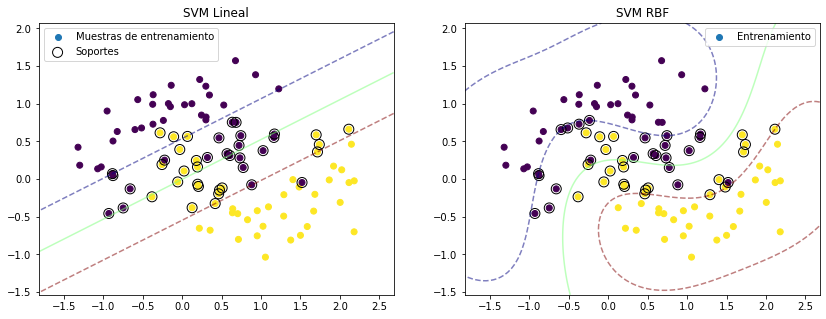

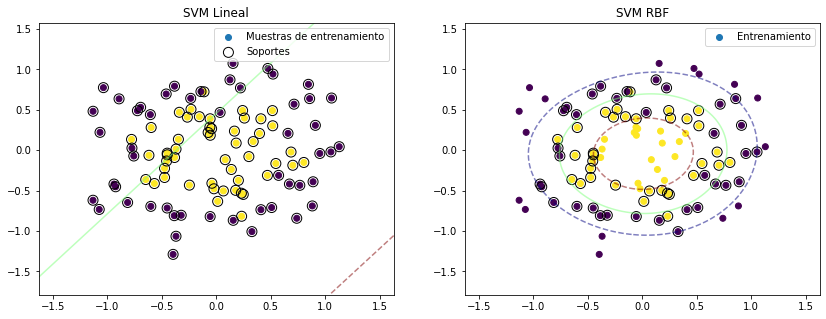

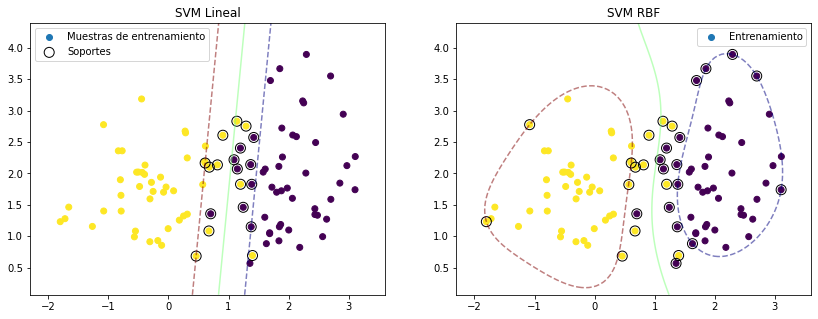

In [13]:
for X,y in datasets:
  #Valores mínimos y máximos de las variables
  xmin = np.min(X,axis=0)
  xmax = np.max(X,axis=0)
  #Malla de valores
  x1, x2 = np.meshgrid(np.linspace(xmin[0]-0.5, xmax[0]+0.5, 100),
                      np.linspace(xmin[1]-0.5, xmax[1]+0.5, 100))
  #Datos para evaluar los clasificadores y graficar la frontera:
  X_plot = np.hstack((x1.reshape(-1,1),x2.reshape(-1,1)))
  svcObj_lin = SVC(gamma='auto', kernel='linear').fit(X,y)
  svcObj_rbf = SVC(gamma='auto', kernel='rbf').fit(X,y)

  #Espacio para entrenar los clasificadores y evaluarlos en X_plot
  
  Ytest_lin = svcObj_lin.decision_function(X_plot)#Reemplazar con el método para evaluar la función de decisión en Xplot
  Ytest_rbf = svcObj_rbf.decision_function(X_plot)#Reemplazar con el método para evaluar la función de decisión en Xplot

  plt.figure(figsize=(14,5)) 
  #Espacio para graficar la frontera, las márgenes y vectores de soporte con SVM lineal
  soportes = svcObj_lin.support_vectors_ # reemplazar por método que extrae los vectores de soporte modelo lineal
  umbrales = [-1,0,1]

  plt.subplot(1,2,1)
  plt.scatter(X[:,0],X[:,1],c=y,label='Entrenamiento')
  plt.scatter(soportes[:, 0], soportes[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')


  # Graficar frontera y margen
  plt.contour(x1, x2, Ytest_lin.reshape(x1.shape), levels=umbrales, alpha=0.5,
            linestyles=['--', '-', '--'],cmap=plt.get_cmap('jet'))

  plt.legend(('Muestras de entrenamiento','Soportes'))
  #plt.legend()
  plt.title('SVM Lineal')

  #Espacio para graficar la frontera, las márgenes y vectores de soporte con SVM RBF
  plt.subplot(1,2,2)
  soportes = svcObj_rbf.support_vectors_ # reemplazar por método que extrae los vectores de soporte modelo no-lineal
  plt.scatter(X[:,0],X[:,1],c=y,label='Entrenamiento')
  plt.scatter(soportes[:, 0], soportes[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')


  # Graficar frontera y margen
  plt.contour(x1, x2, Ytest_rbf.reshape(x1.shape), levels=umbrales, alpha=0.5,
            linestyles=['--', '-', '--'],cmap=plt.get_cmap('jet'))

  plt.legend(('Muestras de entrenamiento','Soportes'))

  plt.legend()
  plt.title('SVM RBF')
  plt.show()

## Actividad 6 
Para la base de datos cargada acontinuación, entrene una `SVM` con kernnel `rbf` y un valor de regularización `C=1`. Varie el factor de escala de forma de `1e-5` a `150`, los pasos lo escogen ustedes. Y grafique:
*   El valor de la deción para todo el espacio de entrada, score.
*   Las muestras de entrenamiento, indicando los vectores de soporte.
*   La frontera de desición y la margen. 
*   Responda:
  *   ¿Qué sucedio?
  *   ¿Altera los hiperparámetros del kernel la clasificación?
  *   ¿Cómo altera el factor de escala la clasificación cin un kernel `rbf`?
  *   ¿Qué sucede con valores de escala muy pequeños en un kernel rbf?
  *   ¿Qué sucede con valores de escala grandes en un kernel rbf?








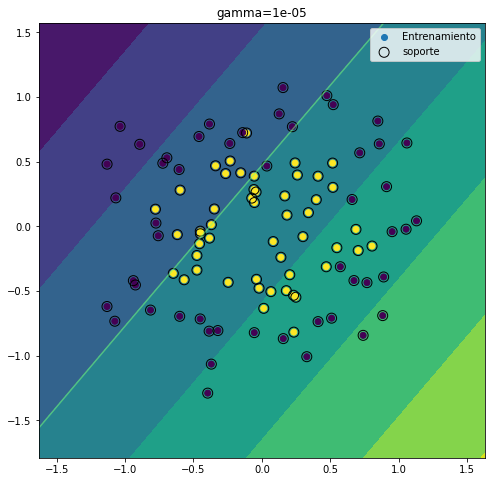

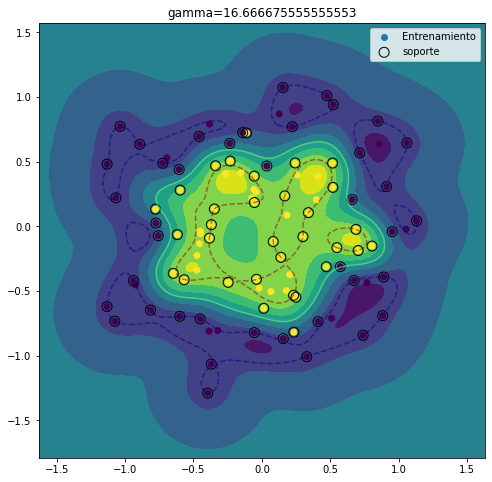

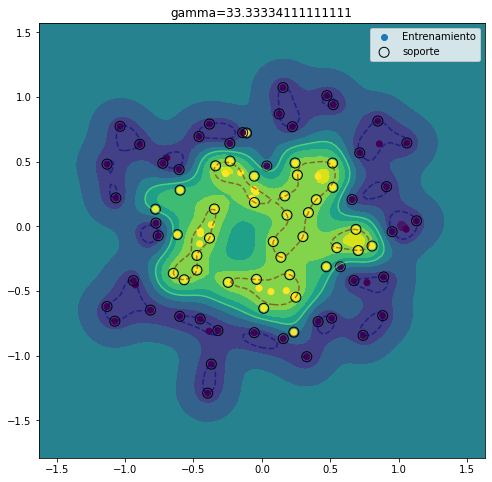

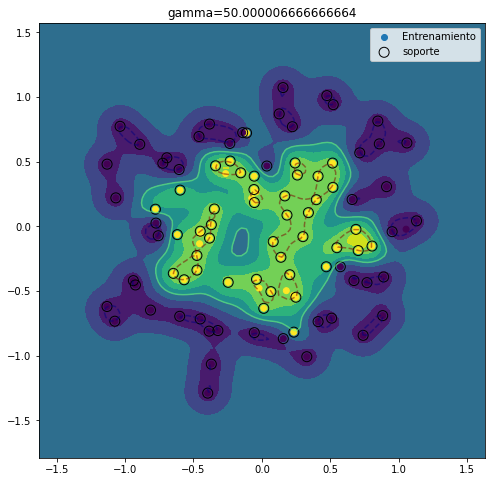

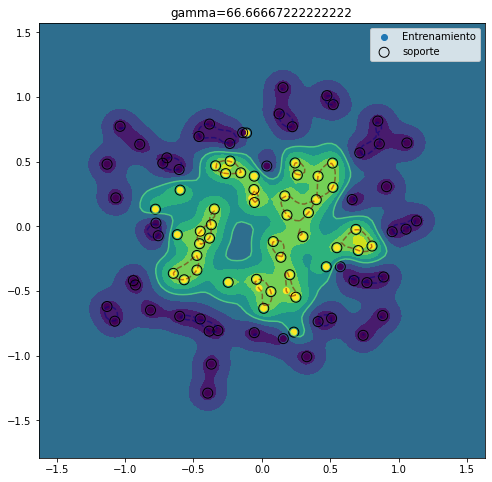

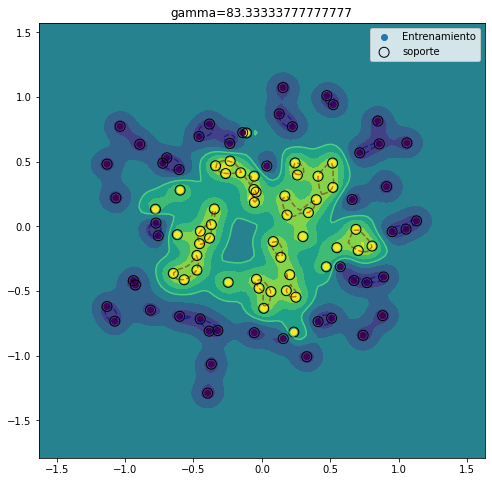

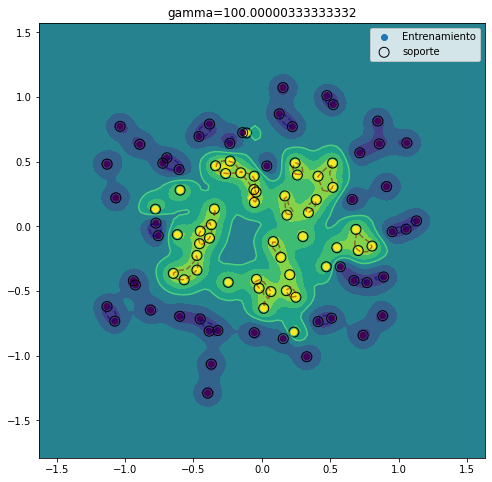

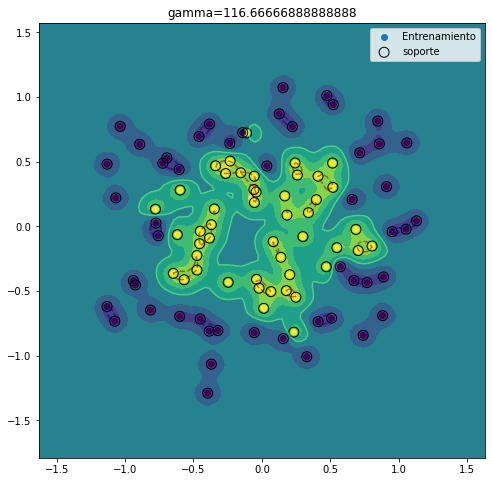

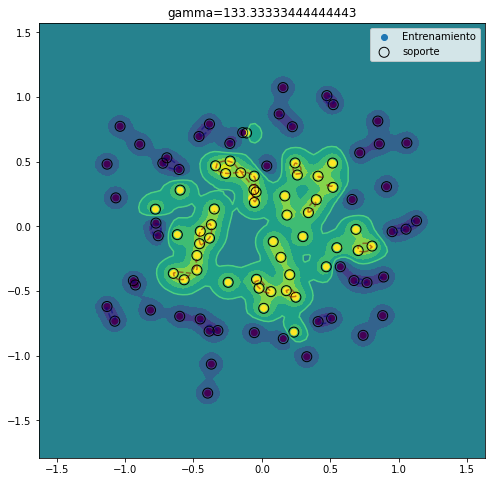

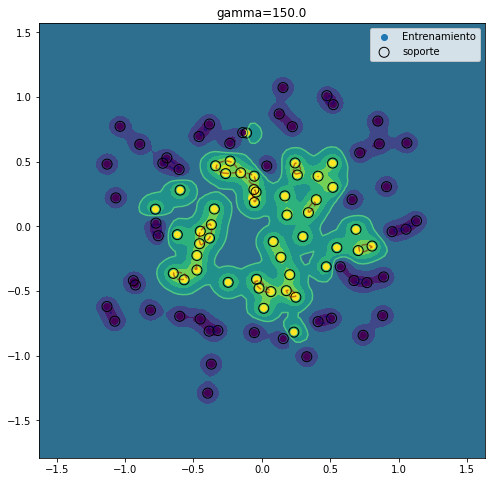

In [14]:
X,y = datasets[1]
#Valores mínimos y máximos de las variables
xmin = np.min(X,axis=0)
xmax = np.max(X,axis=0)
#Malla de valores
x1, x2 = np.meshgrid(np.linspace(xmin[0]-0.5, xmax[0]+0.5, 100),
                    np.linspace(xmin[1]-0.5, xmax[1]+0.5, 100))
#Datos para evaluar los clasificadores y graficar la frontera:
X_plot = np.hstack((x1.reshape(-1,1),x2.reshape(-1,1)))

C = 1
#gamm = 1000
for gamma in np.linspace(1e-5, 150, 10):
    svcObj = SVC(gamma=gamma, kernel='rbf',C=C).fit(X,y)
  
    soportes = svcObj.support_vectors_ # reemplazar por método que extrae los vectores de soporte
    Ytest = svcObj.decision_function(X_plot)#Reemplazar con el método para evaluar la función de decisión en Xplot

    plt.figure(figsize=(8,8)) 

    plt.contourf(x1,x2,Ytest.reshape(x1.shape))
    plt.scatter(X[:,0],X[:,1],c=y,label='Entrenamiento')
    plt.scatter(soportes[:, 0], soportes[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k',label='soporte')


    # Graficar frontera y margen
    plt.contour(x1, x2, Ytest.reshape(x1.shape), levels=umbrales, alpha=0.5,
                linestyles=['--', '-', '--'],cmap=plt.get_cmap('jet'))
    plt.legend()
    plt.title('gamma={}'.format(gamma))

## Actividad 7 (Optical Character Recognition)

Para la base de datos de dígitos escritos a mano, entrene una SVM los clasifique. La función **kernel**, el parámetro de regularización **C** y los hiperparámetros de la función kernel se ran los parámetros libres. Emplee la clase `sklearn.model_selection.GridSearchCV` para explorar difentes configuraciones de parámetros. Discuta los resultados obtenidos del atributo `cv_results_`.

¿Según su criterio, cuál es el mejor juego de parámetros paar esta clasificación? Justifique su
respuesta.

La base de datos DIGITS contiene 1797 muestras en 64 dimensiones, distribuídas en las clases [0 1 2 3 4 5 6 7 8 9] .
0.953826988548437
Mejores parametros 
 C=1.0 
 gamma=0.0031622776601683794 
 kernel=rbf 


c:\program files\python38\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


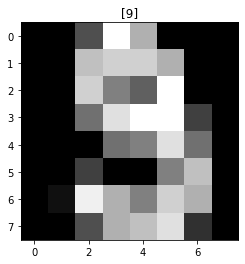

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.334343,0.127936,0.179193,0.020302,0.01,1e-05,rbf,"{'C': 0.01, 'gamma': 1e-05, 'kernel': 'rbf'}",0.100000,0.100000,0.203343,0.197772,0.189415,0.158106,0.047650,20
1,0.141126,0.026785,0.033925,0.003784,0.01,1e-05,linear,"{'C': 0.01, 'gamma': 1e-05, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.969359,0.924791,0.948812,0.021929,2
2,1.385116,0.135713,0.150245,0.021257,0.01,0.00316228,rbf,"{'C': 0.01, 'gamma': 0.0031622776601683794, 'k...",0.100000,0.100000,0.183844,0.194986,0.161560,0.148078,0.040705,21
3,0.121687,0.021316,0.029991,0.006884,0.01,0.00316228,linear,"{'C': 0.01, 'gamma': 0.0031622776601683794, 'k...",0.963889,0.919444,0.966574,0.969359,0.924791,0.948812,0.021929,2
4,1.674190,0.025085,0.217225,0.013359,0.01,1,rbf,"{'C': 0.01, 'gamma': 1.0, 'kernel': 'rbf'}",0.100000,0.100000,0.103064,0.203343,0.189415,0.139164,0.046936,22
5,0.120677,0.010498,0.033111,0.005829,0.01,1,linear,"{'C': 0.01, 'gamma': 1.0, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.969359,0.924791,0.948812,0.021929,2
6,1.648697,0.022282,0.210711,0.024883,0.01,316.228,rbf,"{'C': 0.01, 'gamma': 316.22776601683796, 'kern...",0.100000,0.100000,0.103064,0.100279,0.100279,0.100724,0.001177,25
7,0.140139,0.015896,0.029321,0.004352,0.01,316.228,linear,"{'C': 0.01, 'gamma': 316.22776601683796, 'kern...",0.963889,0.919444,0.966574,0.969359,0.924791,0.948812,0.021929,2
8,1.622260,0.028799,0.219658,0.011813,0.01,100000,rbf,"{'C': 0.01, 'gamma': 100000.0, 'kernel': 'rbf'}",0.100000,0.100000,0.103064,0.100279,0.100279,0.100724,0.001177,25
9,0.119765,0.011199,0.033217,0.006926,0.01,100000,linear,"{'C': 0.01, 'gamma': 100000.0, 'kernel': 'line...",0.963889,0.919444,0.966574,0.969359,0.924791,0.948812,0.021929,2


In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import  make_moons, make_circles, make_blobs, load_digits, make_classification
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV


digits = load_digits()
X, y = digits.data, digits.target
print('La base de datos DIGITS contiene',X.shape[0],'muestras en',X.shape[1],'dimensiones, distribuídas en las clases',np.unique(y),'.')

#A random sample:

kernel=('rbf', 'linear')
C=np.linspace(0.01, 1, 3)
gamma=np.logspace(-5, 5, 5)
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# "accuracy"
# "balanced_accuracy"
# ""
scoring="accuracy"


parameters = {'kernel':kernel, 'C':C, "gamma":gamma}

svcObj = SVC()

clf = GridSearchCV(svcObj, parameters, 
                   n_jobs=-1, scoring=scoring)

clf.fit(X, y)

# cv_results_

print(clf.best_score_)

print("Mejores parametros \n C={} \n gamma={} \n kernel={} ".format(clf.best_params_["C"], 
                                                                    clf.best_params_["gamma"], 
                                                                    clf.best_params_["kernel"])
     )



# Maquina con el mejor rank
# clf.best_estimator_

ind=np.random.randint(low = 0, high = X.shape[0], size = 1);

# clf.best_estimator_.predict(X[ind,:])
result=clf.predict(X[ind,:])

plt.imshow(X[ind,:].reshape((8,8)),cmap=plt.get_cmap('gray'))
plt.title(result)
plt.show()

df=pd.DataFrame(clf.cv_results_)

df.to_csv('file_name.csv')
df.head(-1)


